# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [104]:
# your answer here
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [10]:
# your answer here
employee = pd.read_csv("data/Employee.csv")
employee.head()


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [14]:
# Method 1
# your answer here
employee.groupby("Department").agg({"Salary":"mean"})


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [29]:
# Method 2
# your answer here
employee.pivot_table(values=["Salary"],index=["Department"], aggfunc="mean")

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [48]:
# your answer here
employee.pivot_table(values=["Salary"],index=["Department"],columns=["Title"],aggfunc=["mean"],fill_value=0)

mean                  
           Salary                  
Title          VP analyst associate
Department                         
HR             70    32.5         0
IT             70    32.5        60
Sales           0     0.0        55

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [40]:
# your answer here
employee.pivot_table(values=["Years","Salary"],index=["Title"],
                     aggfunc=["mean"],fill_value=0)

mean      
              Salary Years
Title                     
VP         70.000000  8.00
analyst    32.500000  2.25
associate  56.666667  4.00

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [50]:
# your answer here
employee.pivot_table(values=["Salary"],index=["Department"],columns=["Title"],aggfunc=["count","mean"],fill_value=0)

count                     mean                  
           Salary                   Salary                  
Title          VP analyst associate     VP analyst associate
Department                                                  
HR              1       2         0     70    32.5         0
IT              1       2         1     70    32.5        60
Sales           0       0         2      0     0.0        55

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [55]:
# your answer here
employee.pivot_table(values=["Salary"],index=["Department"],columns=["Title"],
                     aggfunc=lambda x: [np.median(x),np.min(x),np.max(x),np.std(x)],fill_value=0)

Salary                                          
Title                        VP              analyst            associate
Department                                                               
HR          [70.0, 70, 70, 0.0]  [32.5, 30, 35, 2.5]                    0
IT          [70.0, 70, 70, 0.0]  [32.5, 30, 35, 2.5]  [60.0, 60, 60, 0.0]
Sales                         0                    0  [55.0, 55, 55, 0.0]

In [ ]:
"""
The VPs are paid the same regardless of the depart (HR and IT).
Same for the associates (IT and Sales)
The analysts are paid differently within each department, but not by department itself.
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your answer here
"""
DONE ALREADY
"""

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [56]:
# your answer here
employee.pivot_table(values=["Salary"],index=["Department"],aggfunc=["count","sum"],fill_value=0)

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [57]:
# your answer here
employee.pivot_table(values=["Years","Salary"],index=["Department"],columns=["Title"],
                     aggfunc={"Years":"sum","Salary":"mean"},fill_value=0)

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR             70    32.5         0     8       6         0
IT             70    32.5        60     8       3         7
Sales           0     0.0        55     0       0         5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [59]:
# your answer here
employee.pivot_table(values=["Salary"],index=["Department"],
                     aggfunc=lambda x: (np.sum(x)-np.max(x))/np.count_nonzero(x),fill_value=0)

,Salary
Department,
HR,21.666667
IT,31.250000
Sales,27.500000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [62]:
# your answer here
fitbit = pd.read_csv("data/Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [63]:
# your answer here
fitbit.dtypes


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [65]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [67]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062605

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

Text(0, 0.5, 'Steps')

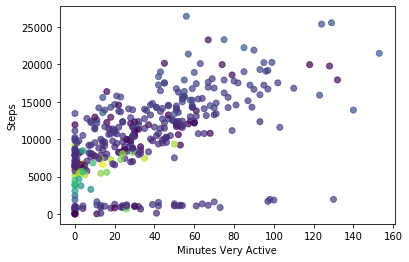

In [77]:
# your answer here
plt.scatter(x=fitbit["Minutes Very Active"],y=fitbit["Steps"],
            c=fitbit["Activity Calories"], alpha=0.7)
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")

#### What can you say about Minute Very Active and Steps? Write a comment below

In [78]:
# your answer here
"""
It appears that in a significant number of cases the more minutes registered as very active,
the more number of steps. Probably this corresponds to days of sport involving movement.
However, in some cases the number of steps does not increase with the number of minutes.
This can be associated with days doing physical activity which does not involve running,
sex for example!
"""

'\nIt appears that in a significant number of cases the more minutes registered as very active,\nthe more number of steps. Probably this corresponds to people playing sport involving movement.\nHowever, in some cases the number of steps does not increase with the number of minutes.\nThis can be associated with people doing sports which do not involve running, sex for example!\n'

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [79]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])


0.07690608062990092

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

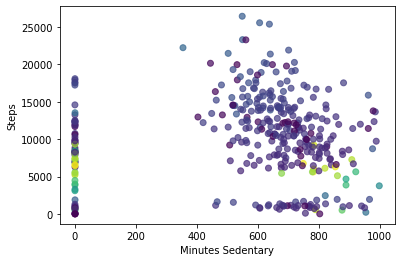

In [81]:
# your answer here
plt.scatter(x=fitbit["Minutes Sedentary"],y=fitbit["Steps"],
            c=fitbit["Activity Calories"], alpha=0.7)
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")

In [82]:
"""
The 2 variables are in fact not correlated.
"""

'\nThe 2 variables are in fact not correlated. If the steps are computed with geolocalization for example,\npeople would register a very high number of steps, while driving or even simply commuting to work.\n'

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [83]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

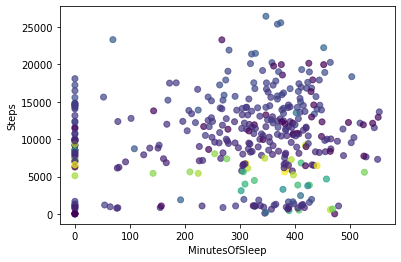

In [86]:
# your answer here
plt.scatter(x=fitbit["MinutesOfSleep"],y=fitbit["Steps"],
            c=fitbit["Activity Calories"], alpha=0.7)
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")

In [ ]:
"""
The 2 variables are in fact not correlated, with even higher dispersion than minutes Sedentary
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [91]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary',
                  'Minutes Very Active', 'MinutesOfSleep']]
cor_fit.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


In [95]:
correlation = cor_fit.corr()
correlation

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [97]:
# your answer here
steps = correlation["Steps"].sort_values(ascending=False)
steps

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [117]:
# your answer here
time_grades = pd.read_csv("data/Time_Grades.csv")
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [119]:
time_grades["Grade"].unique()

array([4, 7, 9, 3, 5, 8, 1, 2])

#### Show visually the frequency distribution of the time_grades dataset.

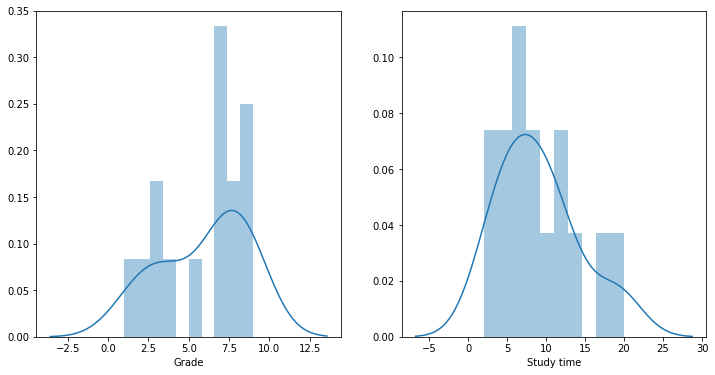

In [110]:
# your answer here
fig, ax = plt.subplots(1,2, figsize=(12,6))

plt.sca(ax[0])
sns.distplot(time_grades["Grade"], bins = 10)
plt.sca(ax[1])
sns.distplot(time_grades["Study time"], bins = 10)

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [113]:
# your answer here
Pearson = time_grades["Grade"].corr(time_grades['Study time'])
Spearman = time_grades["Grade"].corr(time_grades['Study time'], method="spearman")
print(Pearson)
print(Spearman)

0.7980456073578855
0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Grades')

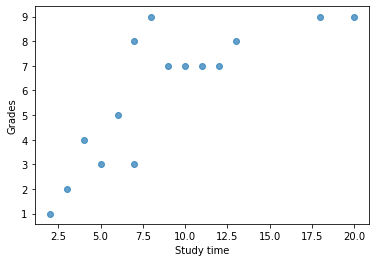

In [115]:
# your answer here
plt.scatter(x=time_grades["Study time"],y=time_grades["Grade"], alpha=0.7)
plt.xlabel("Study time")
plt.ylabel("Grades")

In [116]:
"""
Surprisingly the more study time the higher the grades. Positve correlation that needs to be explored
"""

'\nSurprisingly more study time increases the grades. Positve correlation\n'

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
"""
Pearson product moment correlation
The Pearson correlation evaluates the linear relationship between two continuous variables. 
A relationship is linear when a change in one variable is associated with a proportional change 
in the other variable.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal
variables. In a monotonic relationship, the variables tend to change together, but not 
necessarily at a constant rate. The Spearman correlation coefficient is based on the 
ranked values for each variable rather than the raw data.

In this case. Spearman would be more important, although they are not mutually exclusive.
In fact, to vary the Grade of 1 does not require the same number of Study hours for everyone, thus
there is no fixed proportion.
"""
